In [22]:
import pandas as pd
import requests as rs
from bs4 import BeautifulSoup as soup

In [23]:
rs.get('https://nuforc.org/subndx/?id=all').text

'<!DOCTYPE html>\n<html class="html" dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">\n<head>\n\t<meta charset="UTF-8">\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\n\n\t<title>All NUFORC Reports</title>\n\n\t\t<!-- All in One SEO 4.6.0 - aioseo.com -->\n\t\t<meta name="robots" content="max-image-preview:large" />\n\t\t<link rel="canonical" href="https://nuforc.org/subndx/" />\n\t\t<meta name="generator" content="All in One SEO (AIOSEO) 4.6.0" />\n\t\t<meta property="og:locale" content="en_US" />\n\t\t<meta property="og:site_name" content="NUFORC | Dedicated to the collection and dissemination of objective UFO data" />\n\t\t<meta property="og:type" content="article" />\n\t\t<meta property="og:title" content="All NUFORC Reports" />\n\t\t<meta property="og:url" content="https://nuforc.org/subndx/" />\n\t\t<meta property="og:image" content="https://nuforc.org/wp-content/uploads/2023/08/nuforclogo.gif" />\n\t\t<meta property="og:image:secure_url" content="https://nuforc.or

In [24]:
text = rs.get('https://nuforc.org/subndx/?id=all').text

In [25]:
soup(text, 'html.parser')

<!DOCTYPE html>

<html class="html" dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>All NUFORC Reports</title>
<!-- All in One SEO 4.6.0 - aioseo.com -->
<meta content="max-image-preview:large" name="robots">
<link href="https://nuforc.org/subndx/" rel="canonical">
<meta content="All in One SEO (AIOSEO) 4.6.0" name="generator"/>
<meta content="en_US" property="og:locale"/>
<meta content="NUFORC | Dedicated to the collection and dissemination of objective UFO data" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="All NUFORC Reports" property="og:title"/>
<meta content="https://nuforc.org/subndx/" property="og:url"/>
<meta content="https://nuforc.org/wp-content/uploads/2023/08/nuforclogo.gif" property="og:image"/>
<meta content="https://nuforc.org/wp-content/uploads/2023/08/nuforclogo.gif" property="og:image:secure_url"/>
<meta content="2023-08-20T18:49:

In [26]:
html = soup(text, 'html.parser')

In [27]:
html.find('table')

<table class="responsive display nowrap data-t data-t wpDataTable wpDataTableID-1" data-described-by="table_1_desc" data-wpdatatable_id="1" id="table_1" style="display: none; ">
<!-- Table header -->
<thead>
<tr>
<th class="wdtheader" data-class="expand" style="">Link</th> <th class="wdtheader sort" style="">Occurred</th> <th class="wdtheader sort" style="">City</th> <th class="wdtheader sort" style="">State</th> <th class="wdtheader sort" style="">Country</th> <th class="wdtheader sort" style="">Shape</th> <th class="phone wdtheader sort" data-hide="phone" style="">Summary</th> <th class="phone,tablet wdtheader sort" data-hide="phone,tablet" style="">Reported</th> <th class="phone,tablet wdtheader sort" data-hide="phone,tablet" style="">Posted</th> <th class="phone wdtheader sort" data-hide="phone" style="">Media</th> </tr>
</thead>
<!-- /Table header -->
<!-- Table body -->
<tbody>
<tr id="table_1_row_0">
<td style=""><a data-content="Open" href="/sighting/?id=111" rel="" target="_se

In [28]:
html.findAll('th')

[<th class="wdtheader" data-class="expand" style="">Link</th>,
 <th class="wdtheader sort" style="">Occurred</th>,
 <th class="wdtheader sort" style="">City</th>,
 <th class="wdtheader sort" style="">State</th>,
 <th class="wdtheader sort" style="">Country</th>,
 <th class="wdtheader sort" style="">Shape</th>,
 <th class="phone wdtheader sort" data-hide="phone" style="">Summary</th>,
 <th class="phone,tablet wdtheader sort" data-hide="phone,tablet" style="">Reported</th>,
 <th class="phone,tablet wdtheader sort" data-hide="phone,tablet" style="">Posted</th>,
 <th class="phone wdtheader sort" data-hide="phone" style="">Media</th>]

In [29]:
[h.text for h in html.findAll('th')]

['Link',
 'Occurred',
 'City',
 'State',
 'Country',
 'Shape',
 'Summary',
 'Reported',
 'Posted',
 'Media']

In [30]:
headers = [h.text for h in html.findAll('th')]

In [31]:
html.find('tbody')

<tbody>
<tr id="table_1_row_0">
<td style=""><a data-content="Open" href="/sighting/?id=111" rel="" target="_self">Open</a></td>
<td style="">02/02/1995 23:00</td>
<td style="">Shady Grove</td>
<td style="">OR</td>
<td style="">USA</td>
<td style=""></td>
<td style="">Man and wife witness very bright, moving light over ridge to southwest.  Flashing green &amp; red lights. Good rept.</td>
<td style="">02/03/1995</td>
<td style="">11/02/1999</td>
<td style=""></td>
</tr>
<tr id="table_1_row_1">
<td style=""><a data-content="Open" href="/sighting/?id=113" rel="" target="_self">Open</a></td>
<td style="">02/02/1995 19:15</td>
<td style="">Denmark</td>
<td style="">WI</td>
<td style="">USA</td>
<td style="">Cone</td>
<td style="">Many witness strange craft streaking in night sky.  Descended vertically very fast,  hovered. Reptd. U.S. jets in pursuit. Bizarre.</td>
<td style="">02/03/1995</td>
<td style="">11/02/1999</td>
<td style=""></td>
</tr>
<tr id="table_1_row_2">
<td style=""><a data-

In [32]:
html.find('tbody').findAll('tr')

[<tr id="table_1_row_0">
 <td style=""><a data-content="Open" href="/sighting/?id=111" rel="" target="_self">Open</a></td>
 <td style="">02/02/1995 23:00</td>
 <td style="">Shady Grove</td>
 <td style="">OR</td>
 <td style="">USA</td>
 <td style=""></td>
 <td style="">Man and wife witness very bright, moving light over ridge to southwest.  Flashing green &amp; red lights. Good rept.</td>
 <td style="">02/03/1995</td>
 <td style="">11/02/1999</td>
 <td style=""></td>
 </tr>,
 <tr id="table_1_row_1">
 <td style=""><a data-content="Open" href="/sighting/?id=113" rel="" target="_self">Open</a></td>
 <td style="">02/02/1995 19:15</td>
 <td style="">Denmark</td>
 <td style="">WI</td>
 <td style="">USA</td>
 <td style="">Cone</td>
 <td style="">Many witness strange craft streaking in night sky.  Descended vertically very fast,  hovered. Reptd. U.S. jets in pursuit. Bizarre.</td>
 <td style="">02/03/1995</td>
 <td style="">11/02/1999</td>
 <td style=""></td>
 </tr>,
 <tr id="table_1_row_2">
 <

In [33]:
[[ c.text for c in r.findAll('td')] for r in html.find('tbody').findAll('tr')]

[['Open',
  '02/02/1995 23:00',
  'Shady Grove',
  'OR',
  'USA',
  '',
  'Man and wife witness very bright, moving light over ridge to southwest.  Flashing green & red lights. Good rept.',
  '02/03/1995',
  '11/02/1999',
  ''],
 ['Open',
  '02/02/1995 19:15',
  'Denmark',
  'WI',
  'USA',
  'Cone',
  'Many witness strange craft streaking in night sky.  Descended vertically very fast,  hovered. Reptd. U.S. jets in pursuit. Bizarre.',
  '02/03/1995',
  '11/02/1999',
  ''],
 ['Open',
  '02/02/1995 20:10',
  'Traverse City',
  'MI',
  'USA',
  '',
  '4 children report seeing disc above them; bathed them in white light.  Missing time, clothes.  Other observers. Dramatic.',
  '02/03/1995',
  '11/02/1999',
  ''],
 ['Open',
  '12/13/1994 18:55',
  'Murphy',
  'NC',
  'USA',
  '',
  'Woman reports seeing strange, lighted obj. with  "arms."  Many witnesses and written reports.',
  '02/03/1995',
  '11/02/1999',
  ''],
 ['Open',
  '02/03/1995 23:25',
  'Fontana',
  'CA',
  'USA',
  '',
  '8 adult

In [34]:
data = [[ c.text for c in r.findAll('td')] for r in html.find('tbody').findAll('tr')]

In [35]:
text = rs.get('https://nuforc.org/subndx/?id=all').text # no JSON file, need to get page structure
html = soup(text, 'html.parser')

headers = [ h.text for h in html.findAll('th')]
data = [[ c.text for c in r.findAll('td')] for r in html.find('tbody').findAll('tr')]

In [38]:
df = pd.DataFrame(data,columns=headers)
df

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999,
1,Open,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999,
2,Open,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999,
3,Open,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999,
4,Open,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999,
...,...,...,...,...,...,...,...,...,...,...
95,Open !,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995,11/20/2001,Y
96,Open,01/01/1995 22:45,Anaheim,CA,USA,,Telephoned Report: Man witnessed a motionless...,01/01/1995,11/20/2001,
97,Open,01/01/1995 19:50,Warm Beach,WA,USA,,"Woman witnessed a red ""ball"" from her home nea...",01/02/1995,11/02/1999,
98,Open,01/02/1995 06:25,New Port Richey,FL,USA,,"Man witnesses huge, ""coin shaped,"" orange obje...",01/02/1995,11/02/1999,


In [39]:
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported,Posted
0,02/02/1995 23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999
1,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999
2,02/02/1995 20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999
3,12/13/1994 18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999
4,02/03/1995 23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999


In [40]:
df.shape

(100, 8)

In [41]:
df.Shape.value_counts()

            93
Cone         1
Unknown      1
Disk         1
Triangle     1
Other        1
Fireball     1
Chevron      1
Name: Shape, dtype: int64

In [52]:
df[['Date_Occured','Time_Occured']]=df.Occurred.str.split(' ',expand=True)

In [53]:
df1 = df[['Date_Occured', 'Time_Occured', 'City', 'State', 'Country', 'Shape', 'Summary', 'Reported',
       'Posted', ]]

df1.head()

,Date_Occured,Time_Occured,City,State,Country,Shape,Summary,Reported,Posted
0,02/02/1995,23:00,Shady Grove,OR,USA,,"Man and wife witness very bright, moving light...",02/03/1995,11/02/1999
1,02/02/1995,19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,11/02/1999
2,02/02/1995,20:10,Traverse City,MI,USA,,4 children report seeing disc above them; bath...,02/03/1995,11/02/1999
3,12/13/1994,18:55,Murphy,NC,USA,,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,11/02/1999
4,02/03/1995,23:25,Fontana,CA,USA,,8 adults witness five lights in northern sky f...,03/04/1995,11/02/1999


In [54]:
df.Date_Occured.value_counts()

02/16/1995    7
02/07/1995    7
02/04/1995    6
02/21/1995    6
02/02/1995    5
02/22/1995    5
02/19/1995    5
02/23/1995    4
02/15/1995    4
02/09/1995    4
02/08/1995    3
02/18/1995    3
02/26/1995    3
02/24/1995    3
02/12/1995    3
02/06/1995    3
01/01/1995    3
02/03/1995    2
02/05/1995    2
02/20/1995    2
12/13/1994    1
02/17/1995    1
01/02/1995    1
12/29/1994    1
12/31/1994    1
12/08/1994    1
02/28/1995    1
02/25/1995    1
02/27/1995    1
02/10/1995    1
06/07/1980    1
01/01/1990    1
11/15/1994    1
01/01/1993    1
02/01/1995    1
02/14/1995    1
01/15/1995    1
02/13/1995    1
08/01/1994    1
01/03/1995    1
Name: Date_Occured, dtype: int64

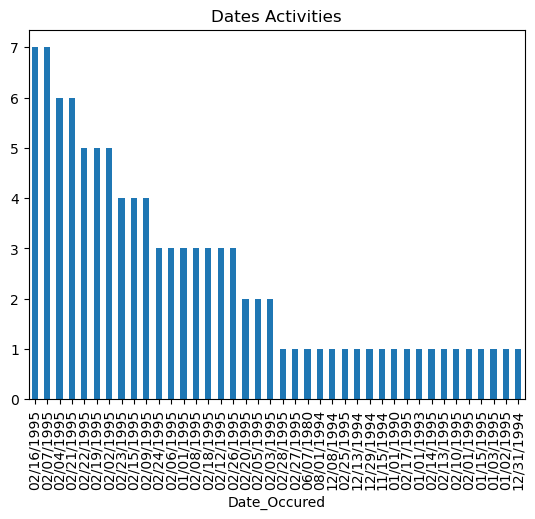

In [55]:
df1.groupby('Date_Occured').size().sort_values(ascending=False).plot.bar(title='Dates Activities');

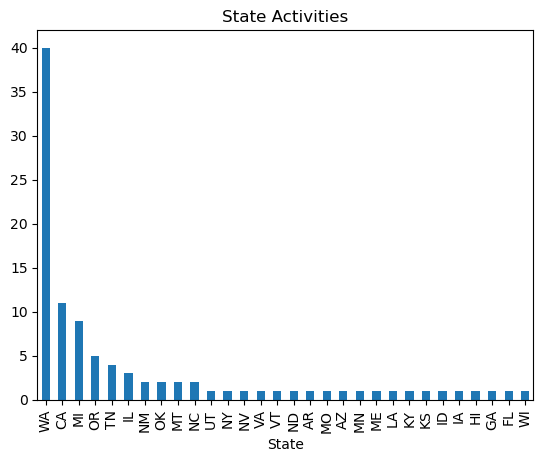

In [45]:
df1.groupby('State').size().sort_values(ascending=False).plot.bar(title='State Activities');